In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

In [49]:
def buildMatrix(N, k, f, bA, bB):
    '''
    Parameters:
    N: int Tamaño de la matriz.
    d: float Contenido de la diagonal.
    '''
    # Matriz de ceros
    A = np.zeros((N,N))
    
    # Primer renglón
    A[0,0] = f(k[2], k[1]) + f(k[0], k[1])
    A[0,1] = -f(k[2], k[1]) 
    
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = f(k[i+1], k[i]) + f(k[i], k[i-1])
        A[i,i+1] = -f(k[i+1], k[i])
        A[i,i-1] = -f(k[i], k[i-1])
    
    # Último renglón
    A[N-1,N-2] = -f(k[N-1], k[N])
    A[N-1,N-1] = f(k[N-1], k[N]) + f(k[N+1], k[N])

    # Se calcula el RHS
    b = np.zeros(N)
    b[0] = f(k[1], k[0]) * bA
    b[-1] = f(k[N+1], k[N]) * bB

    return A, b

In [42]:
def pAritmetico(a, b):
    return 0.5 * (a + b)
    
def mArmonica(a, b):
    return 2 * a * b /(a + b)

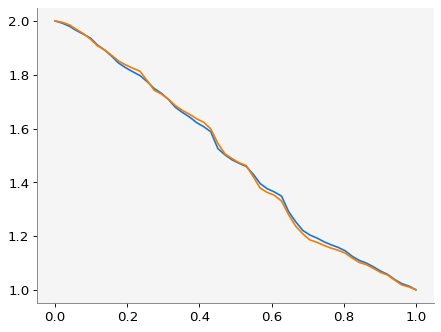

In [56]:
L = 1.0
bA = 2.0
bB = 1.0

N = 50
h = L / (N+1)

x = np.linspace(0, L, N+2)
#k = np.abs(np.sin(4 * np.pi * x)) + 0.1
k = np.random.rand(N+2) + 0.1

A, b = buildMatrix(N, k, pAritmetico, bA, bB)
u1 = np.zeros(N+2)
u1[0] = bA
u1[-1] = bB
u1[1:N+1] = np.linalg.solve(A,b)

A, b = buildMatrix(N, k, mArmonica, bA, bB)
u2 = np.zeros(N+2)
u2[0] = bA
u2[-1] = bB
u2[1:N+1] = np.linalg.solve(A,b)

plt.plot(x,u1)
plt.plot(x,u2)